In [1]:
import numpy as np
import torch

In [2]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [3]:
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [4]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [5]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 1.9358, -0.2942, -1.5561],
        [-1.3525, -1.0447, -1.7691]], requires_grad=True)
tensor([-0.3653,  0.7542], requires_grad=True)


In [6]:
def model(x):
    return x @ w.t() + b

In [7]:
preds = model(inputs)
print(preds)

tensor([[  54.3247, -244.0430],
        [  50.3133, -327.4774],
        [  38.3755, -359.5076],
        [ 126.8578, -247.5790],
        [  -3.9630, -316.6942]], grad_fn=<AddBackward0>)


In [8]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [9]:
def mse(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

In [10]:
loss = mse(preds, targets)
print(loss)

tensor(82547.5234, grad_fn=<MeanBackward0>)


In [11]:
loss.backward()

In [12]:
print(w)
print(w.grad)

tensor([[ 1.9358, -0.2942, -1.5561],
        [-1.3525, -1.0447, -1.7691]], requires_grad=True)
tensor([[ -1322.8129,  -3875.1821,  -2063.9746],
        [-32770.9414, -35761.2891, -22103.9707]])


In [13]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [14]:
loss = mse(preds, targets)
print(loss)

tensor(82547.5234, grad_fn=<MeanBackward0>)


In [15]:
preds = model(inputs)
print(preds)

tensor([[  58.7745, -186.6516],
        [  56.2484, -252.0354],
        [  45.9165, -270.2525],
        [ 130.6373, -190.5929],
        [   2.1150, -244.2747]], grad_fn=<AddBackward0>)


In [16]:
loss = mse(preds, targets)
print(loss)

tensor(56482.5000, grad_fn=<MeanBackward0>)


Text(0.5, 1.0, 'Loss vs. No. of epochs')

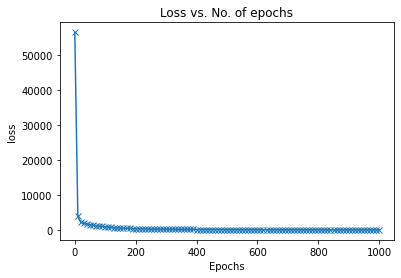

In [17]:
import matplotlib.pyplot as plt
epochs = 1000
losses = [mse(model(inputs), targets).item()]
for i in range(1, epochs+1):
    loss = mse(model(inputs), targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

    if i % 10 == 0:
        losses.append(loss.item())

plt.plot([x*10 for x in range(0,int((epochs/10))+1)], losses, '-x')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')

In [18]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(50.5764, grad_fn=<MeanBackward0>)


In [19]:
preds

tensor([[ 57.8217,  70.9401],
        [ 76.5439,  96.4597],
        [130.5159, 141.5224],
        [ 24.6448,  39.4610],
        [ 89.9156, 110.5389]], grad_fn=<AddBackward0>)

In [20]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [21]:
import torch.nn as nn
#Now using pytorch builtins
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [74, 66, 43],
                   [91, 87, 65],
                   [88, 134, 59],
                   [101, 44, 37],
                   [68, 96, 71],
                   [73, 66, 44],
                   [92, 87, 64],
                   [87, 135, 57],
                   [103, 43, 36],
                   [68, 97, 70]],
                  dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [57, 69],
                    [80, 102],
                    [118, 132],
                    [21, 38],
                    [104, 118],
                    [57, 69],
                    [82, 100],
                    [118, 134],
                    [20, 38],
                    [102, 120]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [22]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

In [23]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [24]:
from torch.utils.data import TensorDataset, DataLoader

In [25]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [26]:
batch_size = 3
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [27]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [101.,  44.,  37.]])
tensor([[119., 133.],
        [ 81., 101.],
        [ 21.,  38.]])


In [28]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5201,  0.4985, -0.1489],
        [ 0.2805,  0.4632,  0.5686]], requires_grad=True)
Parameter containing:
tensor([0.1702, 0.2984], requires_grad=True)


In [29]:
preds = model(inputs)
preds

tensor([[-10.7997,  76.2544],
        [-12.8193, 102.9701],
        [ 13.0876, 119.7416],
        [-36.9559,  69.8605],
        [  1.7191, 103.9168],
        [-11.8184,  76.0718],
        [-13.4667, 103.0756],
        [ 12.4186, 120.5907],
        [-35.9372,  70.0432],
        [  2.0904, 104.2050],
        [-11.4471,  76.3599],
        [-13.8380, 102.7874],
        [ 13.7350, 119.6361],
        [-37.3272,  69.5724],
        [  2.7378, 104.0995]], grad_fn=<AddmmBackward0>)

In [30]:
import torch.nn.functional as F

In [31]:
loss_fn = F.mse_loss

In [32]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(3959.5015, grad_fn=<MseLossBackward0>)


In [33]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [34]:
def train(model, opt, loss_fn, train_dl, epochs):
    losses = [mse(model(inputs), targets).item()]
    for i in range(1, epochs+1):

        for xb, yb in train_dl:
            loss = loss_fn(model(xb), yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

        if i % 10 == 0:
            losses.append(loss.item())
            print('Epoch [{}/{}], Loss: {:.4f}'.format(i, epochs, loss.item()))

    plt.plot([x*10 for x in range(0,int((epochs/10))+1)], losses, '-x')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')

Epoch [10/100], Loss: 167.6022
Epoch [20/100], Loss: 150.4403
Epoch [30/100], Loss: 80.5873
Epoch [40/100], Loss: 52.6127
Epoch [50/100], Loss: 27.7725
Epoch [60/100], Loss: 26.3942
Epoch [70/100], Loss: 11.5774
Epoch [80/100], Loss: 9.2607
Epoch [90/100], Loss: 12.4750
Epoch [100/100], Loss: 12.6413


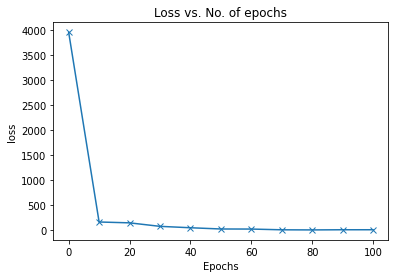

In [35]:
train(model, opt, loss_fn, train_dl, 100)

In [36]:
preds = model(inputs)
preds

tensor([[ 57.3898,  70.8826],
        [ 79.5571,  99.5892],
        [123.4470, 134.7842],
        [ 22.6592,  39.6854],
        [ 96.4903, 115.7365],
        [ 56.0981,  69.8122],
        [ 78.9402,  99.4749],
        [123.4842, 135.2786],
        [ 23.9508,  40.7558],
        [ 97.1652, 116.6926],
        [ 56.7730,  70.7682],
        [ 78.2654,  98.5188],
        [124.0639, 134.8986],
        [ 21.9843,  38.7293],
        [ 97.7820, 116.8070]], grad_fn=<AddmmBackward0>)

In [37]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [38]:
model(torch.tensor([75, 63, 44.]))

tensor([53.2168, 67.7877], grad_fn=<AddBackward0>)